 # Title: Home Credit Default Risk Prediction: Machine Learning Models for Fair and Transparent Credit Decisions


## FP_Group_2 Team Members
​
<div style="display: flex; justify-content: space-around; text-align: center; flex-wrap: wrap;">
​
<div style="margin: 10px;">
<strong>Anastasia</strong><br>
<a href="mailto:anasgrid@iu.edu">anasgrid@iu.edu</a>
</div>
​
<div style="margin: 10px;">
<strong>Debbie</strong><br>
<a href="mailto:forbeckd@iu.edu">forbeckd@iu.edu</a>
</div>
​
<div style="margin: 10px;">
<strong>Swarn</strong><br>
<a href="mailto:sgaba@iu.edu">sgaba@iu.edu</a>
</div>
​
<div style="margin: 10px;">
<strong>Evan</strong><br>
<a href="mailto:evklein@iu.edu">evklein@iu.edu</a>
</div>
​
</div>

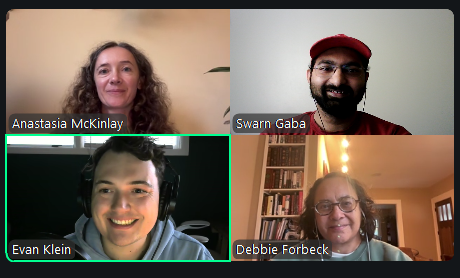

In [1]:
from IPython.display import Image
Image(filename='Group_Photo.png')

## Phase Leader Plan

| Phase | Key Deliverables | Tasks | Phase Lead | Supporting Members |
|---|---|---|---|---|
| **Phase 1 - Project Proposal (Week 12)** | • Project description<br>• Data summary<br>• Metrics<br>• Baseline models & pipeline<br>• Project proposal & tables | • Dataset understanding<br>• Baseline planning<br>• Proposal & tables (phase plan + credit plan in table format) | **Anastasia** | Debbie, Evan, Swarn |
| **Phase 2 - EDA + Baselines (Week 13)** | • EDA<br>• Baseline models (sklearn LR)<br>• Feature engineering + hyperparameter tuning (pipeline)<br>• 2-min video, slides, notebook (Canvas)<br>• Brief report | • EDA: target distribution, missing values, correlations<br>• Baseline models: Logistic Regression, class weights, imputation + OHE pipeline<br>• Feature engineering: income/credit ratios, age, employment years<br>• Hyperparameter tuning & metrics: valid/test AUC, calibration curves | **Debbie** | Swarn, Evan, Anastasia |
| **Phase 3 - Full Feature Engineering + Hyperparameters (Week 15)** | • Additional feature selection<br>• Hyperparameter tuning (cont’d)<br>• Ensemble methods<br>• 2-min video, slides, notebook (Canvas) | • Feature engineering: previous_application, credit_card_balance, installments (min/max/mean/std/ratio/recency counts)<br>• Ensemble: Random Forest Classifier<br>• Model interpretation: top features | **Swarn** | Debbie, Evan, Anastasia |
| **Phase 4 - Advanced Models + Final Delivery (Week 16)** | • Neural Network (MLP)<br>• Advanced model architectures<br>• Loss functions<br>• 2-min video, slides, notebook (Canvas)<br>• Final report | • Deep learning tabular model (MLP)<br>• Final evaluation: compare vs boosting ensemble, threshold tuning, calibration | **Evan** | Anastasia, Debbie, Swarn |


## Credit Assignment Plan

| Team Member | SMART Contribution Summary | Estimated Effort (hrs) | Credit / Role Focus |
|---|---|---:|---|
| **Anastasia** | Plan and outline pipeline structure; implement initial EDA; assist with early feature engineering, baseline and ensemble models; draft proposal + reports | **15 hrs** | Planning, pipeline outlining, EDA, documentation |
| **Debbie** | Build baseline models (Logistic Regression pipeline); implement first round of EDA; prepare slides & presentations | **15 hrs** | Baseline model development, EDA and feature engineering, presentations |
| **Swarn** | Implement extended EDA, baseline model, feature engineering and aggregation across HCDR tables; perform hyperparameter tuning; assist with ensemble models | **15 hrs** | EDA, feature aggregation, baseline model, hyperparameter tuning, ensemble support |
| **Evan** | EDA, validate models; monitor metrics; develop deep learning tabular model; assist with evaluation and interpretation, prepare slides & presentations | **15 hrs** | Validation, metrics, deep learning model, model interpretation, presentations |


## Project Abstract

**Situation:** Lenders often face the challenge of making credit decisions based on incomplete and heterogeneous customer data. Many attributes (e.g., demographic, employment, property, and external credit-score information) vary in quality, reliability, and availability. Such inconsistency in the data complicates the accurate prediction of default risk.

**Task:** In Phase 3 of our Home Credit Default Risk project, we extend the leakage-free logistic regression baseline from Phase 2 by adding feature engineering and an ensemble tree-based model.

**Action:** We construct new ratio and interaction features from the available data (for example, credit-to-income, annuity-to-income, years of employment, and income/family member) and integrate them into a preprocessing pipeline. We then train a Random Forest classifier with hyperparameter tuning using stratified train/validation splits and ROC-AUC as the primary evaluation metric.

**Result:** The best pipeline improves validation ROC-AUC compared with the Phase 2 baseline and produces ...


## Introduction

The Home Credit Default Risk (HCDR) dataset provides a comprehensive view of clients’ demographic, financial, and credit-related attributes. It enables the development of machine learning models designed to predict the likelihood of loan default. However, many of the available features are incomplete and heterogeneous. This variability complicates fair and consistent credit assessment, particularly for individuals with limited credit histories. At the same time, lenders must maintain acceptable levels of lending risk, making accurate prediction both critical and challenging.

In Phase 2, we focused on building a leakage-free logistic regression baseline with a clean preprocessing pipeline and careful handling of class imbalance. Phase 3 builds on that foundation. Here, we design additional features that better capture repayment capacity and stability, such as credit-to-income ratios, annuity burden, credit term, and age/employment signals. We then train an ensemble Random Forest model with hyperparameter tuning and compare its performance to the baseline logistic regression. 

## Dataset


### Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data including telco and transactional information--to predict their clients' repayment abilities.

### Dataset Overview

The `HomeCredit_columns_description.csv` acts as a data dictioanry.

There are 7 different sources of data:

* __application_train/application_test (307k rows, and 48k rows):__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau (1.7 Million rows):__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance (27 Million rows):__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application (1.6 Million rows):__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE (10 Million rows):__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment (13.6 Million rows):__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.


#### Table sizes
```python
name                       [  rows cols]     MegaBytes         
-----------------------  ------------------  -------
application_train       : [  307,511, 122]:   158MB
application_test        : [   48,744, 121]:   25MB
bureau                  : [ 1,716,428, 17]    162MB
bureau_balance          : [ 27,299,925, 3]:   358MB
credit_card_balance     : [  3,840,312, 23]   405MB
installments_payments   : [ 13,605,401, 8]    690MB
previous_application    : [  1,670,214, 37]   386MB
POS_CASH_balance        : [ 10,001,358, 8]    375MB
```

### Prediction Task

The main table, `application_train`, contains one row per loan application and the binary target variable `TARGET`, where 1 indicates that the client had difficulty repaying the loan. Our task is to learn a mapping from the available features to the probability of default, evaluated using ROC-AUC on held-out data and on the Kaggle public/private leaderboards.

The auxiliary tables (such as `bureau`, `bureau_balance`, and others) provide additional historical information that can be aggregated into features if time permits. In this phase, we focus primarily on engineered features derived from `application_train` while keeping the pipeline leakage-free.

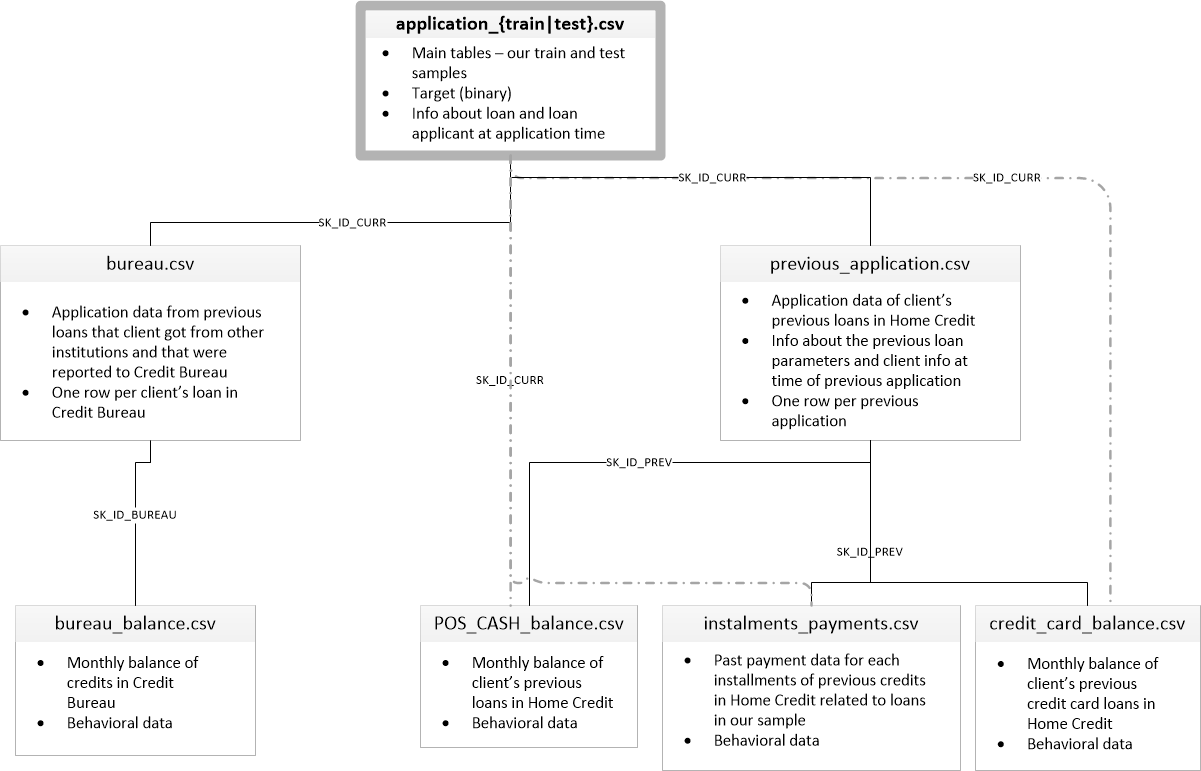

## Metrics to Measure Success

To evaluate model performance and compare alternative modeling strategies, we rely on two metrics: **Accuracy** and **ROC–AUC**. Each metric captures a different aspect of prediction quality.

### **1. Accuracy**
Accuracy provides a simple measure of the overall correctness of the model’s predictions.  
Let the binary labels be $y \in \{0,1\}$ (1 = loan default) and predictions $\hat{y}\in\{0,1\}$.

The confusion matrix and index definitions are:

$$
\begin{array}{c|cc}
 & \hat{y}=1 & \hat{y}=0 \\
\hline
y=1 & \mathrm{TP} & \mathrm{FN} \\
y=0 & \mathrm{FP} & \mathrm{TN}
\end{array}
\qquad
N = \mathrm{TP}+\mathrm{FP}+\mathrm{TN}+\mathrm{FN}
$$

Accuracy is then defined as:

$$
\mathrm{Accuracy} = \frac{\mathrm{TP} + \mathrm{TN}}{N}
$$

- Accuracy counts the proportion of predictions the model classified correctly.
- It measures both correctly predicted **defaulters** (TP) and correctly predicted **non-defaulters** (TN).

### **2. ROC–AUC (Primary Metric)**
The **Receiver Operating Characteristic – Area Under Curve (ROC–AUC)** measures how well the model separates:
- borrowers who **repay** (class 0), and  
- borrowers who **default** (class 1).  

Unlike accuracy, ROC–AUC evaluates the model across **all possible classification thresholds**, making it a more robust performance measure.

**ROC–AUC is the Primary Metric**

The dataset is **highly imbalanced**, with default cases representing only about **8%** of all applications.  
In such settings:
- A model can achieve **high accuracy** by always predicting the majority class (non-default).
- Accuracy becomes misleading because it ignores the minority class performance.
- ROC–AUC provides a threshold-independent measure of **true separation ability**, capturing how well the model distinguishes defaulters from non-defaulters.

**Therefore, ROC–AUC is chosen as the primary metric of success**, while accuracy serves as a supporting reference metric.

## Environment Setup and Data Extraction

Before beginning the exploratory data analysis, we import the necessary Python libraries and prepare the working environment. To ensure reproducibility and smooth execution, we also suppress unnecessary warnings and extract the competition data from the provided ZIP file into the `datasets/` directory. This initialization step ensures that the dataset files are available for further analysis.

In [2]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [3]:
def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily
ds_name = 'application_train'

#DATA_DIR=f"{DATA_DIR}/home-credit-default-risk/"
DATA_DIR = os.path.join(os.getcwd(), "DATA_DIR")

datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

datasets['application_train'].shape

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


(307511, 122)

**Observations**

- The dataset contains **307,511 rows** and **122 columns**, representing a large and rich dataset suitable for robust modeling.
- There are **65 float features, 41 integer features, and 16 categorical (object) features**, indicating a mixed-type dataset that will require appropriate preprocessing such as scaling and one-hot encoding.
- Several columns contain missing values (evident from `info()` where the non-null count is less than the total row count), which will be explored in detail in the missing value analysis section.
- `SK_ID_CURR` uniquely identifies each loan application.
- `TARGET` is a binary variable (1 = default, 0 = non-default).

The `application_train` dataset is high-dimensional, mixed in data types, and contains missing values and potential outliers. These characteristics make systematic EDA crucial before any modeling. The next step involves examining numeric and categorical variables separately.



## EDA Summary

Our exploratory data analysis focused on understanding the structure, quality, and predictive potential of the Home Credit dataset. We identified a strong class imbalance, with the vast majority of clients repaying their loans and only a small proportion defaulting. Categorical variables such as employment type and occupation showed substantial diversity, while missingness analysis revealed notable gaps in several housing and demographic fields.

Correlation analysis showed that many financial variables are only weakly related to the target, which limits their predictive value. At the same time, some feature pairs, specifically, AMT_CREDIT and AMT_GOODS_PRICE, showed extremely high multicollinearity. In contrast, numerical features (e.g. EXT_SOURCE_1/2/3, DAYS_BIRTH, etc) showed clearer differences between defaulters and non-defaulters, making them more informative for the baseline model.

Overall, the EDA has been informative for selecting features for the baseline model and highlighting areas that need deeper analysis. It revealed which features carry meaningful signal, which add noise, and where multicollinearity or missingness may affect performance. These findings provide a clear starting point for improving the pipeline in later phases.

## Modeling Pipelines Overview 

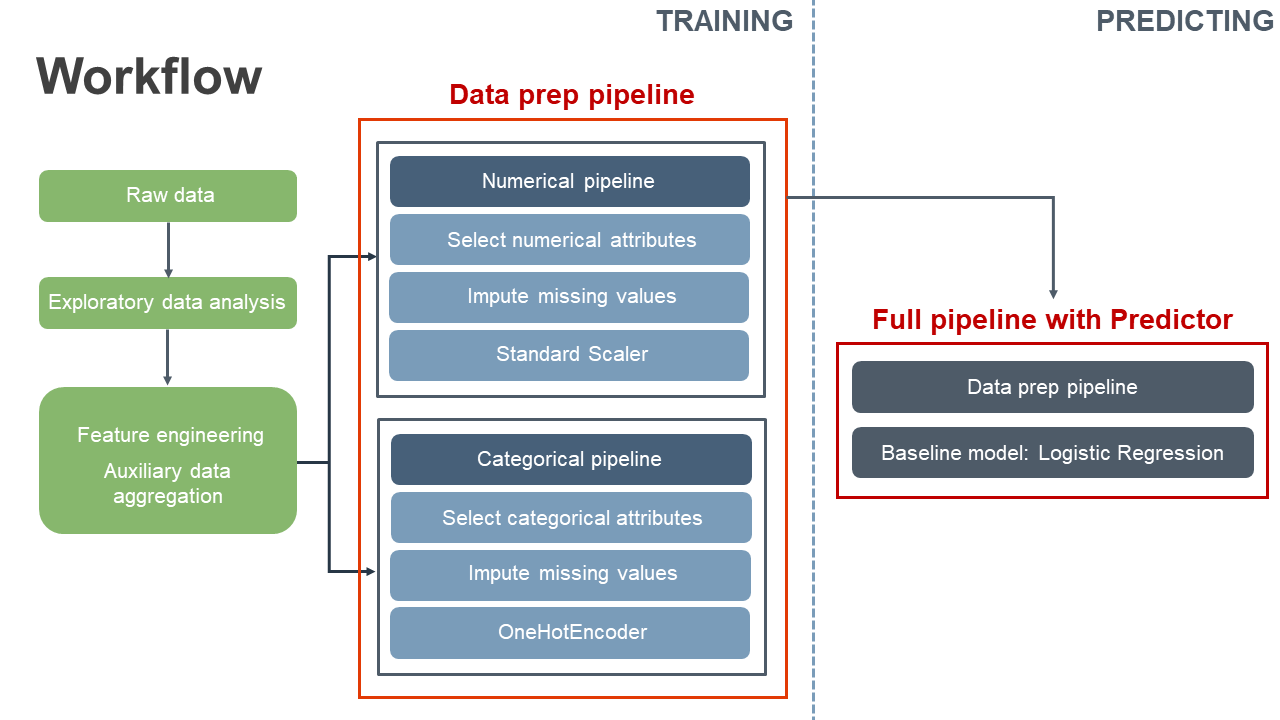

In [4]:
from IPython.display import Image
Image(filename='Overview_Modeling_Pipelines.png')

## Model Pipeline for Logistic Regression

### Feature Selection Using Correlation Thresholding

To prepare the dataset for logistic regression, we first perform a correlation-based filtering step. The goal is to remove features that are either **highly correlated** with others (multicollinearity) or **almost uncorrelated** with the target (non-informative).

### What This Step Does
- Computes the **absolute correlation matrix** of all numerical variables.
- Uses the **upper triangular matrix** to avoid duplicate correlation checks.
- Drops:
  - Features with **correlation > 0.99** → highly collinear, which can destabilize coefficients in logistic regression.
  - Features with **correlation < 0.001** → almost no relationship with any feature, unlikely to add predictive value.
- Creates a refined feature matrix `X_features` by removing the identified columns.
- Separates the **target variable** `y_target` from the predictors.
- Ensures the final `X_features` does **not contain the target column**.

This step reduces noise, prevents redundancy, and prepares a cleaner feature set for building a stable logistic regression model.

In [5]:
app_train = datasets['application_train']

In [6]:
corr_matrix = datasets['application_train'].corr(numeric_only=True).abs()
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

cols_to_remove = [
    col for col in upper_triangle.columns
    if (upper_triangle[col] > 0.99).any()
]

print(len(cols_to_remove))

16


In [7]:
app_train_X = datasets['application_train'].drop(cols_to_remove, axis=1)
app_train_X = app_train_X.drop("SK_ID_CURR", axis=1)

print(app_train_X.columns)

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=105)


In [8]:
y_target = app_train['TARGET']
print(y_target.shape)

X_features = app_train_X
print(X_features.shape)

X_features = X_features.drop(["TARGET"], axis=1)
print(X_features.shape)

(307511,)
(307511, 105)
(307511, 104)


### Separating Numerical and Categorical Features

Before building the preprocessing and modeling pipeline, it is essential to clearly distinguish between **numerical** and **categorical** variables. Logistic Regression requires different preprocessing steps for each type.

### What This Step Does
- Identifies all **numeric columns** (integer and float types)
- Identifies all **categorical columns** (object/string types)

This separation helps in building a clean and modular modeling pipeline where each feature type receives the appropriate transformation.

In [9]:
numeric_cols = X_features.select_dtypes(include=['int64', 'float64']).columns
len(numeric_cols)

88

In [10]:
categorical_cols = X_features.select_dtypes(include=['object']).columns
len(categorical_cols)

16

### Building the Preprocessing Pipeline (Numeric & Categorical Transformations)

To prepare the dataset for Logistic Regression, we construct a systematic preprocessing pipeline that handles numeric and categorical variables separately. This ensures consistent, reproducible, and efficient data transformations.

### What This Step Does

**1. Train-Validation-Test Split**
- The dataset is divided into **train (68%)**, **validation (17%)**, and **test (15%)** sets using `train_test_split`.
- The validation set will be used for tuning and model selection, while the final test set remains untouched for unbiased performance evaluation.

**2. Numeric Feature Pipeline**
- Applies **StandardScaler** to normalize numeric variables.
- Applies **SimpleImputer(mean)** to fill missing numeric values.
- Helps logistic regression converge more reliably by ensuring features are on comparable scales.

**3. Categorical Feature Pipeline**
- Fills missing values with the **most frequent category** (SimpleImputer).
- Encodes categorical variables using **One-Hot Encoding** with `handle_unknown="ignore"` to avoid errors during inference.
- Produces a sparse-friendly, model-ready representation.

**4. ColumnTransformer Integration**
- Combines the numeric and categorical pipelines into a single unified preprocessing step.
- Ensures each feature column flows through the appropriate transformation path.
- Sets `remainder='drop'` to use only selected features.

**5. Transforming the Datasets**
- The fitted pipeline is applied to train, validation, and test sets.
- Produces fully numeric, clean feature matrices ready for model training.
- Extracts the final column names after OHE transformation to maintain interpretability.

This preprocessing pipeline ensures that the logistic regression model receives **clean, scaled, imputed, and encoded** features creating a reliable foundation for training and evaluation.

In [11]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score

# Train/validation/test split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")

# Select numeric + categorical columns
numeric_cols = X_features.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_features.select_dtypes(include=['object']).columns.tolist()

# Pipelines
num_pipeline = Pipeline([
    ('std', StandardScaler()),
    ('imputer', SimpleImputer(strategy='mean'))
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

# Combine features
all_features = numeric_cols + categorical_cols

# Column Transformer
data_pipeline = ColumnTransformer([
    ("num_pipeline", num_pipeline, numeric_cols),
    ("cat_pipeline", cat_pipeline, categorical_cols)
], remainder='drop', n_jobs=-1)

# Fit transformer
data_pipeline.fit(X_train[all_features])
data_pipeline.fit(X_valid[all_features])

# Transform train/valid/test
X_train_transformed = data_pipeline.transform(X_train[all_features])
X_valid_transformed = data_pipeline.transform(X_valid[all_features])
X_test_transformed = data_pipeline.transform(X_test[all_features])

# Column names after One-Hot Encoding
column_names = numeric_cols + list(
    data_pipeline.transformers_[1][1].named_steps["ohe"].get_feature_names_out(categorical_cols)
)

number_of_inputs = X_train_transformed.shape[1]

X train           shape: (209107, 104)
X validation      shape: (52277, 104)
X test            shape: (46127, 104)


### Training Logistic Regression Model & Hyperparameter Tuning

After preprocessing the data, we now build and evaluate a Logistic Regression model. This section covers model creation, training, accuracy evaluation, and tuning using GridSearchCV.

### What This Step Does

**1. Logistic Regression Pipeline**
- A Logistic Regression estimator (`lr_model`) is wrapped inside a Pipeline.
- This model will receive already-transformed data from the preprocessing pipeline.
- `solver='saga'` is chosen because it supports both L1 and L2 regularization and works well for large datasets.

**Standard Logistic Regression (Cross-Entropy Loss)**

$$  -\frac{1}{m}\sum^m_{i=1}\left(y_i\cdot\:\log\:\left(p_i\right)\:+\:\left(1-y_i\right)\cdot\log\left(1-p_i\right)\right) $$

**Ridge-Regularized Logistic Regression (L2 Regularization)**

$$ \operatorname{Ridge\_CXE} =  -\frac{1}{m}\sum^m_{i=1}\left(y_i\cdot\:\log\:\left(p_i\right)\:+\:\left(1-y_i\right)\cdot\log\left(1-p_i\right)\right) + \lambda \sum_{j=1}^{n}\theta_j^2 $$

**Lasso-Regularized Logistic Regression (L1 Regularization)**

$$ \operatorname{Lasso\_CXE} =  -\frac{1}{m}\sum^m_{i=1}\left(y_i\cdot\:\log\:\left(p_i\right)\:+\:\left(1-y_i\right)\cdot\log\left(1-p_i\right)\right) + \lambda \sum_{j=1}^{n}\left| \theta_j \right| $$

where,

CXE is the cross entropy log loss function,

m is the number of training examples,

n is the number of features,

$\operatorname{\lambda}$ is the penalty coefficient

**2. Combined Model Pipeline**
- `full_pipeline` stacks the preprocessing pipeline and logistic regression model.
- Fitting `full_pipeline` automatically applies all transformations and trains the model in one unified step.

**3. Measuring Accuracy**
- Accuracy is computed separately on **train**, **validation**, and **test** datasets.
- Provides a first-level understanding of model performance before hyperparameter tuning.

**4. Hyperparameter Tuning via Grid Search**
- GridSearchCV is applied **only on the transformed data**.
- Searched parameters:
  - **C** values: 1.0, 10.0, 100.0  
  - **Penalty**: none, L1, L2  
- Evaluation metric: **ROC–AUC**, which is more appropriate for imbalanced datasets than accuracy.
- 3-fold cross-validation ensures stable and reliable scoring.
- The best estimator is extracted as `best_lr_model`.

**5. Logging Experiment Results**
- An experiment log (`expLog`) is created to record:
  - Accuracy (Train, Validation, Test)
  - AUC scores (Train, Validation, Test)
  - Best hyperparameters selected by GridSearch

In [12]:
# Create Logistic Regression pipeline
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline

lr_model = Pipeline([("lr", LogisticRegression(solver='saga'))])

# Pipeline for transformation + model training
full_pipeline = make_pipeline(
    data_pipeline,
    lr_model
)

full_pipeline.fit(X_train, y_train)

# Accuracy scores
train_accuracy = full_pipeline.score(X_train, y_train)
valid_accuracy = full_pipeline.score(X_valid, y_valid)
test_accuracy  = full_pipeline.score(X_test, y_test)

# Grid search parameters
lr_params = {
    'lr__C': [1.0, 10.0, 100.0],
    'lr__penalty': ['none', 'l1', 'l2']
}

# GridSearchCV to evaluate ROC-AUC
lr_gridsearch = GridSearchCV(
    lr_model,
    param_grid=lr_params,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

lr_gridsearch.fit(X_train_transformed, y_train)

grid_results_df = pd.DataFrame(lr_gridsearch.cv_results_).T
display(grid_results_df)

best_lr_model = lr_gridsearch.best_estimator_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


,0,1,2,3,4,5,6,7,8
mean_fit_time,0.059454,28.475366,19.35797,0.070438,27.339435,19.390372,0.057092,24.768103,15.926632
std_fit_time,0.001848,0.125685,0.01369,0.007363,0.140328,0.064725,0.002817,2.256615,0.112303
mean_score_time,0.0,0.013988,0.019084,0.0,0.01714,0.017398,0.0,0.016055,0.015358
std_score_time,0.0,0.001105,0.003256,0.0,0.004685,0.00638,0.0,0.004732,0.005171
param_lr__C,1.0,1.0,1.0,10.0,10.0,10.0,100.0,100.0,100.0
param_lr__penalty,none,l1,l2,none,l1,l2,none,l1,l2
params,"{'lr__C': 1.0, 'lr__penalty': 'none'}","{'lr__C': 1.0, 'lr__penalty': 'l1'}","{'lr__C': 1.0, 'lr__penalty': 'l2'}","{'lr__C': 10.0, 'lr__penalty': 'none'}","{'lr__C': 10.0, 'lr__penalty': 'l1'}","{'lr__C': 10.0, 'lr__penalty': 'l2'}","{'lr__C': 100.0, 'lr__penalty': 'none'}","{'lr__C': 100.0, 'lr__penalty': 'l1'}","{'lr__C': 100.0, 'lr__penalty': 'l2'}"
split0_test_score,NaN,0.744382,0.744406,NaN,0.744408,0.744411,NaN,0.744408,0.744407
split1_test_score,NaN,0.742475,0.742473,NaN,0.742484,0.742484,NaN,0.742476,0.742481
split2_test_score,NaN,0.741442,0.74146,NaN,0.741459,0.74146,NaN,0.741461,0.741464


### ROC Curve for Logistic Regression

To assess the discriminatory power of the optimized Logistic Regression model, we evaluate it using the **Receiver Operating Characteristic (ROC) curve** and compute the **Area Under the Curve (AUC)** on the test dataset.

### What This Step Does

**1. Predict Class Probabilities**
- Instead of predicting class labels, we extract the **probability of default (class = 1)**.
- These probabilities serve as inputs to compute ROC metrics.

**2. Compute ROC Metrics**
- `roc_curve()` calculates:
  - **False Positive Rate (FPR)**
  - **True Positive Rate (TPR)**
  - Decision thresholds used by the classifier.
- `auc()` computes the **Area Under the Curve**, which summarizes model performance across all thresholds.

**3. Plot ROC Curve**
- The ROC curve visualizes the trade-off between TPR and FPR.
- The diagonal dashed line represents a **baseline (no-skill)** classifier.

The ROC curve provides a threshold-independent evaluation of how well the model separates defaulters from non-defaulters.

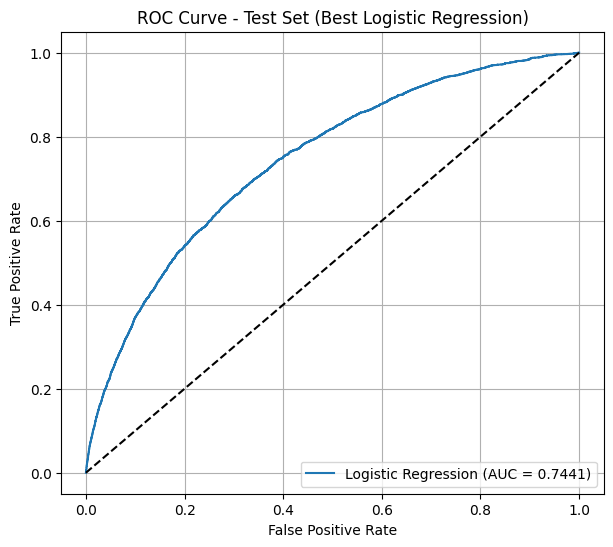

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities on test set
y_test_proba = best_lr_model.predict_proba(X_test_transformed)[:, 1]

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.4f})")
plt.plot([0,1],[0,1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Test Set (Best Logistic Regression)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Phase 2 Pipeline Summary:

In phase 2 we focused on building a leakage-free baseline modeling pipeline using Logistic Regression. After completing EDA, we implemented a standardized preprocessing workflow that handled missing values, scaled numeric features, and applied one-hot encoding to categorical variables. This preprocessing pipeline was combined with a class-balanced Logistic Regression model using the saga solver, which supports both L1 and L2 regularization and is well suited for large, sparse feature spaces. We first trained the full pipeline on the training set and evaluated accuracy on the train, validation, and test splits to establish initial performance. To improve the model, we then applied GridSearchCV on the transformed data to tune the regularization penalty and C values using ROC–AUC as the scoring metric. GridSearchCV tested nine combinations of penalties and C values and showed that all settings produced very similar ROC–AUC scores (≈0.6906). The main difference was computation time, which ranged from about 60 to 110 seconds depending on the regularization setting. The best-performing model used L1 regularization with C = 10, but overall the results were similar across all parameter choices.

In [14]:
from IPython.display import Image
# Image(filename='Phase3.jpg')

## 3. Feature Engineering (Phase 3)

In this phase, we extend the main `application_train` table with a few additional features designed to capture repayment capacity, burden, and stability. The goal is to provide the models with more informative signals while keeping the pipeline simple and transparent.

The additional features:

- **CREDIT_INCOME_RATIO** = `AMT_CREDIT / AMT_INCOME_TOTAL` – how large the requested credit is relative to the client’s income.
- **ANNUITY_INCOME_RATIO** = `AMT_ANNUITY / AMT_INCOME_TOTAL` – the annual repayment burden relative to income.
- **EMPLOYED_YEARS** = `-DAYS_EMPLOYED / 365` after replacing the special value 365243 with missing – a proxy for employment stability.
- **INCOME_PER_FAMILY_MEMBER** = `AMT_INCOME_TOTAL / CNT_FAM_MEMBERS` – income normalised by family size.

To assess new feature impact, we compare cross-validated ROC-AUC for models trained with and without these engineered features using baseline pipeline.

In [15]:
# ===============================
# Phase 3: Feature Engineering
# ===============================

import numpy as np
import pandas as pd

# Work on a copy
app_train_fe = datasets['application_train'].copy()

# ----------------------------------------
# Helper functions
# ----------------------------------------
def safe_div(a, b):
    """Divide a by b with protection against division by zero."""
    return a / (b.replace(0, np.nan) + 1e-5)

def add_feature(df, name, func):
    """Add feature safely only if all required columns exist."""
    try:
        df[name] = func(df)
    except Exception:
        pass


# ----------------------------------------
# 1)Set 1
# ----------------------------------------
add_feature(app_train_fe, "CREDIT_INCOME_RATIO",
            lambda df: safe_div(df["AMT_CREDIT"], df["AMT_INCOME_TOTAL"]))

add_feature(app_train_fe, "ANNUITY_INCOME_RATIO",
            lambda df: safe_div(df["AMT_ANNUITY"], df["AMT_INCOME_TOTAL"]))

add_feature(app_train_fe, "EMPLOYED_YEARS",
            lambda df: -df["DAYS_EMPLOYED"] / 365.25)

add_feature(app_train_fe, "INCOME_PER_FAMILY_MEMBER",
            lambda df: safe_div(df["AMT_INCOME_TOTAL"], df["CNT_FAM_MEMBERS"]))


# ----------------------------------------
# 2) Set 2
# ----------------------------------------

# Payment rate
add_feature(app_train_fe, "PAYMENT_RATE",
            lambda df: df["AMT_ANNUITY"] / (df["AMT_CREDIT"] + 1e-5))

# Credit to Annuity
add_feature(app_train_fe, "CREDIT_TO_ANNUITY_RATIO",
            lambda df: df["AMT_CREDIT"] / (df["AMT_ANNUITY"] + 1e-5))

# Credit vs Goods
add_feature(app_train_fe, "CREDIT_GOODS_PRICE_DIFF",
            lambda df: df["AMT_CREDIT"] - df["AMT_GOODS_PRICE"])

add_feature(app_train_fe, "CREDIT_TO_GOODS_RATIO",
            lambda df: df["AMT_CREDIT"] / (df["AMT_GOODS_PRICE"] + 1e-5))

# Age in years
add_feature(app_train_fe, "AGE_YEARS",
            lambda df: -df["DAYS_BIRTH"] / 365.25)

# Registration, ID, residence durations
add_feature(app_train_fe, "YEARS_REGISTRATION",
            lambda df: -df["DAYS_REGISTRATION"] / 365.25)

# Income to age
add_feature(app_train_fe, "INCOME_AGE_RATIO",
            lambda df: df["AMT_INCOME_TOTAL"] / (df["AGE_YEARS"] + 1e-5))

# ----------------------------------------
# 3) Set 3 - Aggregate feature engineering from `bureau.csv`
# This set of features targets potential new features aggregated using data from `bureau.csv`, which tracks
# user credit attributes across multiple bureaus of credit. From this set we can determine borrower creditworthiness based on
# largely negative behavioral trends - things like how many days currently overdue, how much credit they currently are
# over their existing limit, etc...
# ----------------------------------------
datasets['bureaus'] = load_data(os.path.join(DATA_DIR, f'bureau.csv'), 'bureau.csv')

bureau_agg = datasets['bureaus'].groupby('SK_ID_CURR').agg({
    'CREDIT_DAY_OVERDUE': 'sum',
    'AMT_CREDIT_MAX_OVERDUE': ['mean', 'median', 'sum'],
}).reset_index()
bureau_agg.columns = [
    'SK_ID_CURR',
    'TOTAL_DAYS_CREDIT_OVERDUE_SUM_ALL_BUREAUS',
    'AMT_CREDIT_MAX_OVERDUE_MEAN_ALL_BUREAUS',
    'AMT_CREDIT_MAX_OVERDUE_MEDIAN_ALL_BUREAUS',
    'AMT_CREDIT_MAX_OVERDUE_SUM_ALL_BUREAUS']
app_train_fe = app_train_fe.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')

# ----------------------------------------
# 4) Set 4 - Aggregate feature engineering from `installments_payments.csv`
# This set of features targets potential new features aggregated using data from `installments_payments.csv`, which tracks
# user payment behavior on various credit lines and payment plans. Examples of potential features include how large typical installments are,
# how often clients pay ahead or are late, or how often are clients paying the entire amount of a loan in a single installment.
# ----------------------------------------
datasets['installments_payments'] = load_data(os.path.join(DATA_DIR, f'installments_payments.csv'), 'installments_payments.csv')
datasets['installments_payments']['DIFF_INSTALMENT_PAYMENT'] = (
    datasets['installments_payments']['DAYS_INSTALMENT'] - 
    datasets['installments_payments']['DAYS_ENTRY_PAYMENT']
)
installments_agg = datasets['installments_payments'].groupby('SK_ID_CURR').agg({
    'AMT_INSTALMENT': ['mean', 'median', 'sum'],
    'NUM_INSTALMENT_VERSION': ['mean'],
    'DIFF_INSTALMENT_PAYMENT': ['mean', 'max', 'min']
}).reset_index()
installments_agg.columns = [
    'SK_ID_CURR',
    'AMT_INSTALMENT_ALL_MEAN',
    'AMT_INSTALMENT_ALL_MEDIAN',
    'AMT_INSTALMENT_ALL_SUM',
    'INSTALMENT_TYPE_VERSION_MEAN',
    'DIFF_INSTALLMENT_PAYMENT_DATES_MEAN',
    'DIFF_INSTALLMENT_PAYMENT_DATES_MAX',
    'DIFF_INSTALLMENT_PAYMENT_DATES_MIN'
]
app_train_fe = app_train_fe.merge(installments_agg, on = 'SK_ID_CURR', how = 'left')

# ----------------------------------------
# Summaries
# ----------------------------------------
new_eng_features = [c for c in app_train_fe.columns if c not in datasets['application_train'].columns]

print(f"Engineered features created ({len(new_eng_features)}):")
for f in new_eng_features:
    print("  •", f)

# Prepare X and y for Phase 3 models
y_phase3 = app_train_fe["TARGET"]
X_phase3 = app_train_fe.drop(columns=["TARGET", "SK_ID_CURR"], errors='ignore')

print("\nFinal Phase 3 feature matrix shape:", X_phase3.shape)
print("Target shape:", y_phase3.shape)


bureau.csv: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


installments_payments.csv: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


Engineered features created (22):
  • CREDIT_INCOME_RATIO
  • ANNUITY_INCOME_RATIO
  • EMPLOYED_YEARS
  • INCOME_PER_FAMILY_MEMBER
  • PAYMENT_RATE
  • CREDIT_TO_ANNUITY_RATIO
  • CREDIT_GOODS_PRICE_DIFF
  • CREDIT_TO_GOODS_RATIO
  • AGE_YEARS
  • YEARS_REGISTRATION
  • INCOME_AGE_RATIO
  • TOTAL_DAYS_CREDIT_OVERDUE_SUM_ALL_BUREAUS
  • AMT_CREDIT_MAX_OVERDUE_MEAN_ALL_BUREAUS
  • AMT_CREDIT_MAX_OVERDUE_MEDIAN_ALL_BUREAUS
  • AMT_CREDIT_MAX_OVERDUE_SUM_ALL_BUREAUS
  • AMT_INSTALMENT_ALL_MEAN
  • AMT_INSTALMENT_ALL_MEDIAN
  • AMT_INSTALMENT_ALL_SUM
  • INSTALMENT_TYPE_VERSION_MEAN
  • DIFF_INSTALLMENT_PAYMENT_DATES_MEAN
  • DIFF_INSTALLMENT_PAYMENT_DATES_MAX
  • DIFF_INSTALLMENT_PAYMENT_DATES_MIN

Final Phase 3 feature matrix shape: (307511, 142)
Target shape: (307511,)


In [16]:
# ===============================
# Phase 3: Evaluate Engineered Features
# ===============================

# Identify engineered columns by checking which columns were added
engineered_cols = [c for c in X_phase3.columns if c not in datasets['application_train'].columns]

print(f"Evaluating {len(engineered_cols)} engineered features...\n")

corrs = (
    X_phase3[engineered_cols]
    .join(y_phase3)
    .corr(method='spearman')['TARGET']
    .drop('TARGET')
    .sort_values(ascending=False)
)

corrs_df = pd.DataFrame({"Feature": corrs.index, "Spearman_corr_with_TARGET": corrs.values})
display(corrs_df)

# Highlight strongest positive/negative associations
print("\nTop positively associated:")
display(corrs_df.head(5))

print("Top negatively associated:")
display(corrs_df.tail(5))


Evaluating 22 engineered features...



,Feature,Spearman_corr_with_TARGET
0,CREDIT_TO_GOODS_RATIO,0.061518
1,AMT_CREDIT_MAX_OVERDUE_MEAN_ALL_BUREAUS,0.052075
2,AMT_CREDIT_MAX_OVERDUE_MEDIAN_ALL_BUREAUS,0.044855
3,CREDIT_GOODS_PRICE_DIFF,0.042544
4,AMT_CREDIT_MAX_OVERDUE_SUM_ALL_BUREAUS,0.041401
5,TOTAL_DAYS_CREDIT_OVERDUE_SUM_ALL_BUREAUS,0.034857
6,PAYMENT_RATE,0.029707
7,INCOME_AGE_RATIO,0.024251
8,ANNUITY_INCOME_RATIO,0.018422
9,CREDIT_INCOME_RATIO,-0.001822



Top positively associated:


,Feature,Spearman_corr_with_TARGET
0,CREDIT_TO_GOODS_RATIO,0.061518
1,AMT_CREDIT_MAX_OVERDUE_MEAN_ALL_BUREAUS,0.052075
2,AMT_CREDIT_MAX_OVERDUE_MEDIAN_ALL_BUREAUS,0.044855
3,CREDIT_GOODS_PRICE_DIFF,0.042544
4,AMT_CREDIT_MAX_OVERDUE_SUM_ALL_BUREAUS,0.041401


Top negatively associated:


,Feature,Spearman_corr_with_TARGET
17,YEARS_REGISTRATION,-0.040171
18,DIFF_INSTALLMENT_PAYMENT_DATES_MEAN,-0.040525
19,AMT_INSTALMENT_ALL_MEDIAN,-0.040778
20,DIFF_INSTALLMENT_PAYMENT_DATES_MIN,-0.047553
21,AGE_YEARS,-0.078328


## 4. Ensemble Techniques

Ensemble techniques are often implemented to improve predictive performance and accuracy metrics for models without modifying underlying hyperparameters or model execution. In this section, we will implement 4 different ensemble techniques in order to squeeze more predictive power. We will gauge our results for each technique against our baseline logistic regression and other ensemble techniques, delivering a full gap-analysis later in this report. Additionally, we will compare ensemble model performance against our baseline feature set from `application_train` with additional engineered features as included above. This should help us analyze the performance of our engineered features in practice against validation and test sets.

**Pipeline overview**

1. **Train/validation/test split**: use stratified splits to keep the class imbalance consistent across folds.
2. **Preprocessing**:
   - Numeric features: median imputation + standardisation.
   - Categorical features: most-frequent imputation + one-hot encoding with `handle_unknown="ignore"`.
3. **Model Selection**
4. **Hyperparameter tuning**: Grid search will be implemented to test a number of hyperparameters for fine-tuning in our terminal models.
5. **Evaluation**:
   - Best cross-validated ROC-AUC from the search.
   - Hold-out test ROC-AUC and confusion-matrix-style counts at a chosen threshold.
   - Feature importance plots for interpretation.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer


In [18]:
# ===============================================
# Features Set 1 only
# ===============================================

# 1) Define engineered feature names (must match Phase 3 above)
engineered_candidates = [
    'CREDIT_INCOME_RATIO',
    'ANNUITY_INCOME_RATIO',
    'EMPLOYED_YEARS',
    'INCOME_PER_FAMILY_MEMBER',
    'AMT_CREDIT_MAX_OVERDUE_MEAN_ALL_BUREAUS',
    'TOTAL_DAYS_CREDIT_OVERDUE_SUM_ALL_BUREAUS',
    'DIFF_INSTALLMENT_PAYMENT_DATES_MEAN',
    'AMT_INSTALMENT_ALL_MEDIAN',
]

# Numeric + categorical columns
numeric_cols_all = X_phase3.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols        = X_phase3.select_dtypes(include=['object']).columns.tolist()

engineered_feats = [c for c in engineered_candidates if c in numeric_cols_all]
baseline_numeric_cols = [c for c in numeric_cols_all if c not in engineered_feats]

print(f"Total numeric features:                    {len(numeric_cols_all)}")
print(f"Baseline numeric features (no engineered): {len(baseline_numeric_cols)}")
print(f"Engineered features present:               {engineered_feats}")
print(f"Categorical features:                      {cat_cols}")

# Baseline and engineered feature matrices (numeric + categorical)
X_baseline = X_phase3[baseline_numeric_cols + cat_cols].copy()
X_with_eng = X_phase3[baseline_numeric_cols + engineered_feats + cat_cols].copy()

# 2) Shared train/val/test indices so both models use the same splits
n_samples = X_phase3.shape[0]
all_idx = np.arange(n_samples)

idx_train_full, idx_test = train_test_split(
    all_idx,
    test_size=0.2,
    random_state=42,
    stratify=y_phase3
)

idx_train, idx_val = train_test_split(
    idx_train_full,
    test_size=0.2,
    random_state=42,
    stratify=y_phase3.iloc[idx_train_full]
)

def split_by_idx(X, y, idx_train, idx_val, idx_test):
    X_train = X.iloc[idx_train]
    X_val   = X.iloc[idx_val]
    X_test  = X.iloc[idx_test]
    y_train = y.iloc[idx_train]
    y_val   = y.iloc[idx_val]
    y_test  = y.iloc[idx_test]
    return X_train, X_val, X_test, y_train, y_val, y_test

Xb_train, Xb_val, Xb_test, yb_train, yb_val, yb_test = split_by_idx(
    X_baseline, y_phase3, idx_train, idx_val, idx_test
)
Xe_train, Xe_val, Xe_test, ye_train, ye_val, ye_test = split_by_idx(
    X_with_eng, y_phase3, idx_train, idx_val, idx_test
)

print("\n[info] Shapes for BASELINE feature set:")
print(f"  Xb_train: {Xb_train.shape}, Xb_val: {Xb_val.shape}, Xb_test: {Xb_test.shape}")

print("\n[info] Shapes for +ENGINEERED feature set:")
print(f"  Xe_train: {Xe_train.shape}, Xe_val: {Xe_val.shape}, Xe_test: {Xe_test.shape}")


Total numeric features:                    126
Baseline numeric features (no engineered): 118
Engineered features present:               ['CREDIT_INCOME_RATIO', 'ANNUITY_INCOME_RATIO', 'EMPLOYED_YEARS', 'INCOME_PER_FAMILY_MEMBER', 'AMT_CREDIT_MAX_OVERDUE_MEAN_ALL_BUREAUS', 'TOTAL_DAYS_CREDIT_OVERDUE_SUM_ALL_BUREAUS', 'DIFF_INSTALLMENT_PAYMENT_DATES_MEAN', 'AMT_INSTALMENT_ALL_MEDIAN']
Categorical features:                      ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

[info] Shapes for BASELINE feature set:
  Xb_train: (196806, 134), Xb_val: (49202, 134), Xb_test: (61503, 134)

[info] Shapes for +ENGINEERED feature set:
  Xe_train: (196806, 142), Xe_val: (49202, 142), Xe_test: (61503, 142)


In [19]:
# ===============================================
# Preprocessor builder (num + cat)
# ===============================================

def make_preprocessor(numeric_cols, cat_cols):
    """
    Build a ColumnTransformer that:
      - imputes numeric with median
      - imputes categoricals with most_frequent + OneHotEncodes
    """
    # Handle OneHotEncoder API differences (sparse vs sparse_output)
    try:
        cat_transformer = Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
        ])
    except TypeError:
        cat_transformer = Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("ohe", OneHotEncoder(handle_unknown="ignore", sparse=False))
        ])

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", SimpleImputer(strategy="median"), numeric_cols),
            ("cat", cat_transformer, cat_cols)
        ],
        remainder="drop"
    )
    return preprocessor

### 4.1 Random Forest Pipeline with Hyperparameter Tuning

In this section, we train an ensemble model based on the Random Forest classifier. Tree-based ensembles can capture non-linear interactions and handle mixed numeric/categorical inputs after basic preprocessing. We will implement sklearn's `RandomForestClassifier` with class weighting to address imbalance. In terms of hyperparameter tuning, we will implement a paramater grid to study grid search over depth, number of trees, and minimum samples per split/leaf.

In [20]:
# ===============================================
# RF hyperparameter tuning (Baseline)
# ===============================================

print("\n[info] RF Hyperparameter Tuning on BASELINE features (fast grid) ...")

preprocessor_base = make_preprocessor(baseline_numeric_cols, cat_cols)

rf_base = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    class_weight="balanced_subsample"
)

rf_pipeline = Pipeline([
    ("preprocess", preprocessor_base),
    ("rf", rf_base)
])

# Smaller grid: 2*2*2 = 8 configs → 8 * 3 folds = 24 fits
rf_param_grid = {
    "rf__n_estimators":     [150, 250],
    "rf__max_depth":        [10, 20],
    "rf__min_samples_leaf": [1, 2],
    # keep defaults for min_samples_split, max_features='sqrt'
}

rf_grid = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=rf_param_grid,
    cv=3,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

rf_grid.fit(Xb_train, yb_train)

print("\nBest RF parameters (baseline features):")
print(rf_grid.best_params_)
print(f"Best CV ROC-AUC: {rf_grid.best_score_:.4f}")

# Log all RF grid results
rf_cv_df = pd.DataFrame(rf_grid.cv_results_)

rf_status_cols = [
    "param_rf__n_estimators",
    "param_rf__max_depth",
    "param_rf__min_samples_leaf",
    "mean_train_score",
    "std_train_score",
    "mean_test_score",
    "std_test_score",
    "rank_test_score"
]

print("\nRF GridSearch status (sorted by best CV ROC-AUC):")
rf_status_table = (
    rf_cv_df[rf_status_cols]
    .sort_values("rank_test_score")
    .reset_index(drop=True)
)
display(rf_status_table)

print("\nRF log:")
for i, row in rf_status_table.iterrows():
    print(
        f"[{i+1:02d}] n_estimators={row['param_rf__n_estimators']}, "
        f"max_depth={row['param_rf__max_depth']}, "
        f"min_samples_leaf={row['param_rf__min_samples_leaf']}, "
        f"train AUC={row['mean_train_score']:.3f}, "
        f"CV AUC={row['mean_test_score']:.3f}"
    )

# Best RF params (strip 'rf__' prefix)
rf_best_params = {
    k.replace("rf__", ""): v
    for k, v in rf_grid.best_params_.items()
    if k.startswith("rf__")
}
rf_best_params


[info] RF Hyperparameter Tuning on BASELINE features (fast grid) ...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=150; total time=  39.0s
[CV] END rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=150; total time=  39.3s
[CV] END rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=150; total time=  39.9s
[CV] END rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=150; total time=  42.8s
[CV] END rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=150; total time=  45.9s
[CV] END rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=150; total time=  51.6s
[CV] END rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=150; total time=  54.2s
[CV] END rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=250; total time=  56.8s
[CV] END rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=250; total time=  57.4s
[CV] END rf__max_depth=10, rf__min_samples

,param_rf__n_estimators,param_rf__max_depth,param_rf__min_samples_leaf,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
0,250,10,2,0.845087,0.001073,0.736292,0.000982,1
1,150,10,2,0.844863,0.001109,0.735655,0.001067,2
2,250,10,1,0.845391,0.001371,0.735438,0.000524,3
3,150,10,1,0.845060,0.001198,0.734796,0.000324,4
4,250,20,2,0.992415,0.000299,0.728425,0.000963,5
5,150,20,2,0.991969,0.000344,0.726514,0.001290,6
6,250,20,1,0.993416,0.000211,0.725132,0.000726,7
7,150,20,1,0.993150,0.000493,0.723860,0.000030,8



RF log:
[01] n_estimators=250.0, max_depth=10.0, min_samples_leaf=2.0, train AUC=0.845, CV AUC=0.736
[02] n_estimators=150.0, max_depth=10.0, min_samples_leaf=2.0, train AUC=0.845, CV AUC=0.736
[03] n_estimators=250.0, max_depth=10.0, min_samples_leaf=1.0, train AUC=0.845, CV AUC=0.735
[04] n_estimators=150.0, max_depth=10.0, min_samples_leaf=1.0, train AUC=0.845, CV AUC=0.735
[05] n_estimators=250.0, max_depth=20.0, min_samples_leaf=2.0, train AUC=0.992, CV AUC=0.728
[06] n_estimators=150.0, max_depth=20.0, min_samples_leaf=2.0, train AUC=0.992, CV AUC=0.727
[07] n_estimators=250.0, max_depth=20.0, min_samples_leaf=1.0, train AUC=0.993, CV AUC=0.725
[08] n_estimators=150.0, max_depth=20.0, min_samples_leaf=1.0, train AUC=0.993, CV AUC=0.724


{'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 250}

### 4.2 Histogram Based Gradient Boosting with Hyperparameter Tuning

In this section, we train an ensemble model elevated by a Histogram Based Gradient Boostiging classifier. Boosting is a common ensemble techniques which decreases variance at the cost of some bias - by sequentially adding tree model, model error can be fine-tuned such that each new tree attempts to correct errors introduced by previous trees (Brownlee). Gradient boosting additionally treats this error correction as an optimization problem - by providing a well-defined loss then predictive power can be slowly decreased over training time. *Histogram-based* gradient boosting is an additional elaboration on this technique which aggregates training examples into histographic "bins", allowing the model to be trained on an aggregate distribution of the training set. This technique is somewhat stochastic, and allows for better performance (speed) than traditional gradient boosting techniques.

Our parameter grid for fine-tuning will test parameters for HBGB including learning rate, maximum tree leaf nodes, and L2 regularization coefficient. Our model will work off of a `log_loss` function, since this is a binomial classification problem.



In [21]:
# ===============================================
# HBGB hyperparameter tuning (Baseline)
# ===============================================
from sklearn.ensemble import HistGradientBoostingClassifier

print("\n[info] HistGradientBoostingClassifier Hyperparameter Tuning on BASELINE features (fast grid) ...")

preprocessor_base = make_preprocessor(baseline_numeric_cols, cat_cols)

hbgb_base = HistGradientBoostingClassifier(
    random_state=42,
    loss = 'log_loss'
)

hbgb_pipeline = Pipeline([
    ("preprocess", preprocessor_base),
    ("hbgb", hbgb_base)
])

hbgb_param_grid = {
    "hbgb__learning_rate": [1, 0.5, 0.1, 0.01],
    "hbgb__max_leaf_nodes": [5, 10, 31, 50, 100],
    "hbgb__l2_regularization": [0, 1, 5, 10, 100]
}

hbgb_grid = GridSearchCV(
    estimator=hbgb_pipeline,
    param_grid=hbgb_param_grid,
    cv=3,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

hbgb_grid.fit(Xb_train, yb_train)

print("\nBest HBGB parameters (baseline features):")
print(hbgb_grid.best_params_)
print(f"Best CV ROC-AUC: {hbgb_grid.best_score_:.4f}")

# Log all HBGB grid results
hbgb_cv_df = pd.DataFrame(hbgb_grid.cv_results_)

hbgb_status_cols = [
    "param_hbgb__learning_rate",
    "param_hbgb__max_leaf_nodes",
    "param_hbgb__l2_regularization",
    "mean_train_score",
    "std_train_score",
    "mean_test_score",
    "std_test_score",
    "rank_test_score"
]

print("\nHBGB GridSearch status (sorted by best CV ROC-AUC):")
hbgb_status_table = (
    hbgb_cv_df[hbgb_status_cols]
    .sort_values("rank_test_score")
    .reset_index(drop=True)
)
display(hbgb_status_table)

print("\nHBGB log:")
for i, row in hbgb_status_table.iterrows():
    print(
        f"[{i+1:02d}] learning_rate={row['param_hbgb__learning_rate']}, "
        f"max_leaf_nodes={row['param_hbgb__max_leaf_nodes']}, "
        f"l2_regularization={row['param_hbgb__l2_regularization']}, "
        f"train AUC={row['mean_train_score']:.3f}, "
        f"CV AUC={row['mean_test_score']:.3f}"
    )

# Best HBGB params (strip 'hbgb__' prefix)
hbgb_best_params = {
    k.replace("hbgb__", ""): v
    for k, v in hbgb_grid.best_params_.items()
    if k.startswith("hbgb__")
}
hbgb_best_params


[info] HistGradientBoostingClassifier Hyperparameter Tuning on BASELINE features (fast grid) ...
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END hbgb__l2_regularization=0, hbgb__learning_rate=1, hbgb__max_leaf_nodes=50; total time=   5.6s
[CV] END hbgb__l2_regularization=0, hbgb__learning_rate=1, hbgb__max_leaf_nodes=50; total time=   5.6s
[CV] END hbgb__l2_regularization=0, hbgb__learning_rate=1, hbgb__max_leaf_nodes=100; total time=   5.9s
[CV] END hbgb__l2_regularization=0, hbgb__learning_rate=1, hbgb__max_leaf_nodes=10; total time=   6.7s
[CV] END hbgb__l2_regularization=0, hbgb__learning_rate=1, hbgb__max_leaf_nodes=31; total time=   6.7s
[CV] END hbgb__l2_regularization=0, hbgb__learning_rate=1, hbgb__max_leaf_nodes=10; total time=   7.0s
[CV] END hbgb__l2_regularization=0, hbgb__learning_rate=1, hbgb__max_leaf_nodes=31; total time=   7.1s
[CV] END hbgb__l2_regularization=0, hbgb__learning_rate=1, hbgb__max_leaf_nodes=10; total time=   6.6s
[CV] END hbgb_

,param_hbgb__learning_rate,param_hbgb__max_leaf_nodes,param_hbgb__l2_regularization,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
0,0.1,50,100,0.824183,0.001124,0.766115,0.002294,1
1,0.1,31,100,0.806977,0.001038,0.766020,0.002571,2
2,0.1,31,10,0.817643,0.001908,0.765770,0.001100,3
3,0.1,31,5,0.822777,0.000994,0.765438,0.000899,4
4,0.1,50,10,0.836754,0.002424,0.765021,0.001127,5
...,...,...,...,...,...,...,...,...
95,1.0,50,1,0.794847,0.003079,0.712001,0.003877,96
96,1.0,100,10,0.847549,0.001809,0.705279,0.000977,97
97,1.0,100,5,0.848044,0.003585,0.701204,0.001931,98
98,1.0,100,0,0.786799,0.003633,0.694652,0.002798,99



HBGB log:
[01] learning_rate=0.1, max_leaf_nodes=50.0, l2_regularization=100.0, train AUC=0.824, CV AUC=0.766
[02] learning_rate=0.1, max_leaf_nodes=31.0, l2_regularization=100.0, train AUC=0.807, CV AUC=0.766
[03] learning_rate=0.1, max_leaf_nodes=31.0, l2_regularization=10.0, train AUC=0.818, CV AUC=0.766
[04] learning_rate=0.1, max_leaf_nodes=31.0, l2_regularization=5.0, train AUC=0.823, CV AUC=0.765
[05] learning_rate=0.1, max_leaf_nodes=50.0, l2_regularization=10.0, train AUC=0.837, CV AUC=0.765
[06] learning_rate=0.1, max_leaf_nodes=100.0, l2_regularization=100.0, train AUC=0.854, CV AUC=0.765
[07] learning_rate=0.1, max_leaf_nodes=50.0, l2_regularization=5.0, train AUC=0.845, CV AUC=0.765
[08] learning_rate=0.1, max_leaf_nodes=31.0, l2_regularization=1.0, train AUC=0.827, CV AUC=0.764
[09] learning_rate=0.1, max_leaf_nodes=10.0, l2_regularization=10.0, train AUC=0.782, CV AUC=0.764
[10] learning_rate=0.1, max_leaf_nodes=100.0, l2_regularization=10.0, train AUC=0.883, CV AUC=0.7

{'l2_regularization': 100, 'learning_rate': 0.1, 'max_leaf_nodes': 50}

### 4.3 Bagging + Baseline LR with Hyperparameter Tuning

**Bagging**, also known as boostrap aggregation, is a meta-technique for ensemble learning. Unlike other ensemble methods such as RF, where the ensemble methodology and the classifier are one-and-the-same, boostrap aggregation is able to wrap existing tuned classification algorithms to enhance performance and metrics. Bagging works by training many smaller, less performative algorithms, and aggregates them together to form a cohesive robust model which performs well and is strengthened against high variability. In this section, we will fit our fine-tuned logistic regression algorithm with bagging to attempt to increase the performance of the logistic regression.

Our parameter grid for fine-tuning will test with a number of estimators ranging from 5 to 25.



In [22]:
# ===============================================
# Bagging hyperparameter tuning (Baseline)
# ===============================================
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

print("\n[info] Bagging Hyperparameter Tuning on BASELINE features (fast grid) ...")

preprocessor_base = make_preprocessor(baseline_numeric_cols, cat_cols)

bagging_base = BaggingClassifier(n_jobs = -1)

bagging_pipeline = Pipeline([
    ("preprocess", preprocessor_base),
    ("bag", bagging_base)
])

lr_params = {k.replace('lr__', ''): v 
            for k, v in lr_gridsearch.best_params_.items() 
            if k.startswith('lr__')}
bagging_param_grid = {
    "bag__estimator": [
        LogisticRegression(random_state=42, max_iter=1000, **lr_params),
    ],
    "bag__n_estimators": [5, 10, 25]
}

bagging_grid = GridSearchCV(
    estimator=bagging_pipeline,
    param_grid=bagging_param_grid,
    cv=3,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

bagging_grid.fit(Xb_train, yb_train)

print("\nBest Bagging parameters (baseline features):")
print(bagging_grid.best_params_)
print(f"Best CV ROC-AUC: {bagging_grid.best_score_:.4f}")

# Log all Bagging grid results
bagging_cv_df = pd.DataFrame(bagging_grid.cv_results_)

bagging_status_cols = [
    "param_bag__estimator",
    "param_bag__n_estimators",
    "mean_train_score",
    "std_train_score",
    "mean_test_score",
    "std_test_score",
    "rank_test_score"
]

print("\nBagging GridSearch status (sorted by best CV ROC-AUC):")
bagging_status_table = (
    bagging_cv_df[bagging_status_cols]
    .sort_values("rank_test_score")
    .reset_index(drop=True)
)
display(bagging_status_table)

print("\nBagging log:")
for i, row in bagging_status_table.iterrows():
    print(
        f"[{i+1:02d}] estimator={row['param_bag__estimator']}, "
        f"n_estimators={row['param_bag__n_estimators']}, "
        f"train AUC={row['mean_train_score']:.3f}, "
        f"CV AUC={row['mean_test_score']:.3f}"
    )

# Best Bagging params (strip 'bagging__' prefix)
bagging_best_params = {
    k.replace("bag__", ""): v
    for k, v in bagging_grid.best_params_.items()
    if k.startswith("bag__")
}
bagging_best_params


[info] Bagging Hyperparameter Tuning on BASELINE features (fast grid) ...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END bag__estimator=LogisticRegression(C=10.0, max_iter=1000, random_state=42), bag__n_estimators=5; total time= 2.5min
[CV] END bag__estimator=LogisticRegression(C=10.0, max_iter=1000, random_state=42), bag__n_estimators=5; total time= 2.6min
[CV] END bag__estimator=LogisticRegression(C=10.0, max_iter=1000, random_state=42), bag__n_estimators=5; total time= 2.6min
[CV] END bag__estimator=LogisticRegression(C=10.0, max_iter=1000, random_state=42), bag__n_estimators=10; total time= 3.4min
[CV] END bag__estimator=LogisticRegression(C=10.0, max_iter=1000, random_state=42), bag__n_estimators=10; total time= 3.4min
[CV] END bag__estimator=LogisticRegression(C=10.0, max_iter=1000, random_state=42), bag__n_estimators=10; total time= 3.4min
[CV] END bag__estimator=LogisticRegression(C=10.0, max_iter=1000, random_state=42), bag__n_estimators=25; total time= 5

,param_bag__estimator,param_bag__n_estimators,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
0,"LogisticRegression(C=10.0, max_iter=1000, rand...",5,0.629841,0.001321,0.629327,0.002556,1
1,"LogisticRegression(C=10.0, max_iter=1000, rand...",10,0.629863,0.001231,0.629267,0.002764,2
2,"LogisticRegression(C=10.0, max_iter=1000, rand...",25,0.629830,0.001384,0.629238,0.002493,3



Bagging log:
[01] estimator=LogisticRegression(C=10.0, max_iter=1000, random_state=42), n_estimators=5, train AUC=0.630, CV AUC=0.629
[02] estimator=LogisticRegression(C=10.0, max_iter=1000, random_state=42), n_estimators=10, train AUC=0.630, CV AUC=0.629
[03] estimator=LogisticRegression(C=10.0, max_iter=1000, random_state=42), n_estimators=25, train AUC=0.630, CV AUC=0.629


{'estimator': LogisticRegression(C=10.0, max_iter=1000, random_state=42),
 'n_estimators': 5}

### 4.4 Voting + Baseline LR with Hyperparameter Tuning

**Voting** is an ensemble technique which aggregates multiple models together and delivers results by aggregating the model results and picking a "winning" target output - either via ensemble model probability (soft voting) or majority decision (hard voting). In this approach, we will fit our voting classifier with our baseline logistic regression for our baseline feature set and advanced feature set. This method should make our final model slightly more robust. Hard voting is not available for this feature set, as some NaNs still exist. Soft voting however is still available.



In [23]:
# ===============================================
# Voting hyperparameter tuning (Baseline)
# ===============================================
from sklearn.ensemble import VotingClassifier

print("\n[info] Voting Hyperparameter Tuning on BASELINE features (fast grid) ...")

preprocessor_base = make_preprocessor(baseline_numeric_cols, cat_cols)

lr_params = {k.replace('lr__', ''): v 
            for k, v in lr_gridsearch.best_params_.items() 
            if k.startswith('lr__')}
voting_base = VotingClassifier(estimators = [('lr', LogisticRegression(random_state=42, max_iter=1000, **lr_params))], n_jobs = -1)

voting_pipeline = Pipeline([
    ("preprocess", preprocessor_base),
    ("vote", voting_base)
])

voting_param_grid = {
    "vote__voting": ['soft'] # No hard, as it results in NaNs.
}

voting_grid = GridSearchCV(
    estimator=voting_pipeline,
    param_grid=voting_param_grid,
    cv=3,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

voting_grid.fit(Xb_train, yb_train)

print("\nBest Voting parameters (baseline features):")
print(voting_grid.best_params_)
print(f"Best CV ROC-AUC: {voting_grid.best_score_:.4f}")

# Log all Voting grid results
voting_cv_df = pd.DataFrame(voting_grid.cv_results_)

voting_status_cols = [
    "param_vote__voting",
    "mean_train_score",
    "std_train_score",
    "mean_test_score",
    "std_test_score",
    "rank_test_score"
]

print("\nVoting GridSearch status (sorted by best CV ROC-AUC):")
voting_status_table = (
    voting_cv_df[voting_status_cols]
    .sort_values("rank_test_score")
    .reset_index(drop=True)
)
display(voting_status_table)

print("\Voting log:")
for i, row in voting_status_table.iterrows():
    print(
        # f"[{i+1:02d}] estimator={row['param_vote__estimator']}, "
        f"voting={row['param_vote__voting']}, "
        f"train AUC={row['mean_train_score']:.3f}, "
        f"CV AUC={row['mean_test_score']:.3f}"
    )

# Best Voting params (strip 'bagging__' prefix)
voting_best_params = {
    k.replace("vote__", ""): v
    for k, v in voting_grid.best_params_.items()
    if k.startswith("vote__")
}
voting_best_params


[info] Voting Hyperparameter Tuning on BASELINE features (fast grid) ...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ..................................vote__voting=soft; total time=   9.9s
[CV] END ..................................vote__voting=soft; total time=   9.9s
[CV] END ..................................vote__voting=soft; total time=  11.8s

Best Voting parameters (baseline features):
{'vote__voting': 'soft'}
Best CV ROC-AUC: 0.6293

Voting GridSearch status (sorted by best CV ROC-AUC):


,param_vote__voting,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
0,soft,0.629773,0.001298,0.629275,0.00272,1


\Voting log:
voting=soft, train AUC=0.630, CV AUC=0.629


{'voting': 'soft'}

In [77]:
# ===============================================
# Phase 3: Final Ensemble – Baseline vs + Engineered
# ===============================================
from collections import namedtuple

RecordedPipeline = namedtuple('TrainedPipeline', ['ModelName', 'FeatureSet', 'Pipeline'])

def build_baseline_lr_pipeline(numeric_cols, cat_cols):
    preproc = make_preprocessor(numeric_cols, cat_cols)
    lr_params = {k.replace('lr__', ''): v 
                for k, v in lr_gridsearch.best_params_.items() 
                if k.startswith('lr__')}
    lr = LogisticRegression(random_state = 42, **lr_params)
    return Pipeline([
        ('preprocess', preproc),
        ('lr', lr)
    ])

def build_rf_pipeline(numeric_cols, cat_cols, rf_params):
    preproc = make_preprocessor(numeric_cols, cat_cols)
    rf = RandomForestClassifier(
        random_state=42,
        n_jobs=-1,
        class_weight="balanced_subsample",
        **rf_params
    )
    return Pipeline([
        ("preprocess", preproc),
        ("rf", rf)
    ])

def build_hbgb_pipeline(numeric_cols, cat_cols, hbgb_params):
    preproc = make_preprocessor(numeric_cols, cat_cols)
    hbgb = HistGradientBoostingClassifier(
        random_state = 42,
        **hbgb_params
    )
    return Pipeline([
        ("preprocess", preproc),
        ("hbgb", hbgb)
    ])

def build_bagging_pipeline(numeric_cols, cat_cols, bagging_params):
    preproc = make_preprocessor(numeric_cols, cat_cols)
    bag_clf = BaggingClassifier(
        random_state = 42,
        **bagging_params
    )
    return Pipeline([
        ("preprocess", preproc),
        ("bag", bag_clf)
    ])

def build_voting_pipeline(numeric_cols, cat_cols, voting_params):
    preproc = make_preprocessor(numeric_cols, cat_cols)
    vote_clf = VotingClassifier(
        estimators=[('lr', LogisticRegression(random_state=42, max_iter=1000, **lr_params))],
        **voting_params
    )
    return Pipeline([
        ("preprocess", preproc),
        ("vote", vote_clf)
    ])

recorded_pipelines = [
    # Baseline LR pipelines with tuned params
    RecordedPipeline('Baseline Logistic Regression', 'Base', build_baseline_lr_pipeline(baseline_numeric_cols, cat_cols)),
    RecordedPipeline('Baseline Logistic Regression', 'Base + Engineered', build_baseline_lr_pipeline(baseline_numeric_cols + engineered_feats, cat_cols)),

    # Pipelines with tuned RF hyperparameters
    RecordedPipeline('Random Forest', 'Base', build_rf_pipeline(baseline_numeric_cols, cat_cols, rf_best_params)),
    RecordedPipeline('Random Forest', 'Base + Engineered', build_rf_pipeline(baseline_numeric_cols + engineered_feats, cat_cols, rf_best_params)),

    # Pipelines with tuned Histogram-based boosting classifiers hyperparameters
    RecordedPipeline('Histogram Based Gradient Boosting', 'Base', build_hbgb_pipeline(baseline_numeric_cols, cat_cols, hbgb_best_params)),
    RecordedPipeline('Histogram Based Gradient Boosting', 'Base + Engineered', build_hbgb_pipeline(baseline_numeric_cols + engineered_feats, cat_cols, hbgb_best_params)),

    # Pipelines with tuned Bagging classifiers hyperparameters
    RecordedPipeline('Bagging', 'Base', build_bagging_pipeline(baseline_numeric_cols, cat_cols, bagging_best_params)),
    RecordedPipeline('Bagging', 'Base + Engineered', build_bagging_pipeline(baseline_numeric_cols + engineered_feats, cat_cols, bagging_best_params)),

    # Pipelines with tuned Voting classifier hyperparameters
    RecordedPipeline('Voting', 'Base', build_voting_pipeline(baseline_numeric_cols, cat_cols, voting_best_params)),
    RecordedPipeline('Voting', 'Base + Engineered', build_voting_pipeline(baseline_numeric_cols + engineered_feats, cat_cols, voting_best_params)),
]

eval_expLog = pd.DataFrame(columns = ['Pipeline', 'Utilized Features', 'train_auc_roc', 'val_auc_roc', 'test_auc_roc'])
def eval_pipeline(name, utilized_features, pipe, X_tr, y_tr, X_val, y_val, X_te, y_te):
    auc_rocs = []
    for split_name, X, y in [("Train", X_tr, y_tr),
                             ("Valid", X_val, y_val),
                             ("Test",  X_te, y_te)]:
        proba = pipe.predict_proba(X)[:, 1]
        auc_score = roc_auc_score(y, proba)
        auc_rocs.append(auc_score)
        print(f"[{name} / {pipeline.FeatureSet}] {split_name:5s} ROC-AUC: {auc_score:.4f}")
    eval_expLog.loc[len(eval_expLog)] = [name, utilized_features, auc_rocs[0], auc_rocs[1], auc_rocs[2]]

# Train pipelines
for pipeline in recorded_pipelines:
    print(f"\n[info] Training final BASELINE {pipeline.ModelName} with tuned hyperparameters (Feature Set = {pipeline.FeatureSet}) ...")
    X = Xb_train if pipeline.FeatureSet == 'Base' else Xe_train
    y = yb_train if pipeline.FeatureSet == 'Base' else ye_train
    pipeline.Pipeline.fit(X, y)

# Evaluate
print("\n[info] ROC-AUC summary:")
for pipeline in recorded_pipelines:
    X_train = Xb_train if pipeline.FeatureSet == 'Base' else Xe_train
    y_train = yb_train if pipeline.FeatureSet == 'Base' else ye_train
    X_val = Xb_val if pipeline.FeatureSet == 'Base' else Xe_val
    y_val = yb_val if pipeline.FeatureSet == 'Base' else ye_val
    X_test = Xb_test if pipeline.FeatureSet == 'Base' else Xe_test
    y_test = yb_test if pipeline.FeatureSet == 'Base' else ye_test
    eval_pipeline(pipeline.ModelName, pipeline.FeatureSet, pipeline.Pipeline, X_train, y_train, X_val, y_val, X_test, y_test)


[info] Training final BASELINE Baseline Logistic Regression with tuned hyperparameters (Feature Set = Base) ...

[info] Training final BASELINE Baseline Logistic Regression with tuned hyperparameters (Feature Set = Base + Engineered) ...

[info] Training final BASELINE Random Forest with tuned hyperparameters (Feature Set = Base) ...

[info] Training final BASELINE Random Forest with tuned hyperparameters (Feature Set = Base + Engineered) ...

[info] Training final BASELINE Histogram Based Gradient Boosting with tuned hyperparameters (Feature Set = Base) ...

[info] Training final BASELINE Histogram Based Gradient Boosting with tuned hyperparameters (Feature Set = Base + Engineered) ...

[info] Training final BASELINE Bagging with tuned hyperparameters (Feature Set = Base) ...

[info] Training final BASELINE Bagging with tuned hyperparameters (Feature Set = Base + Engineered) ...

[info] Training final BASELINE Voting with tuned hyperparameters (Feature Set = Base) ...

[info] Trainin

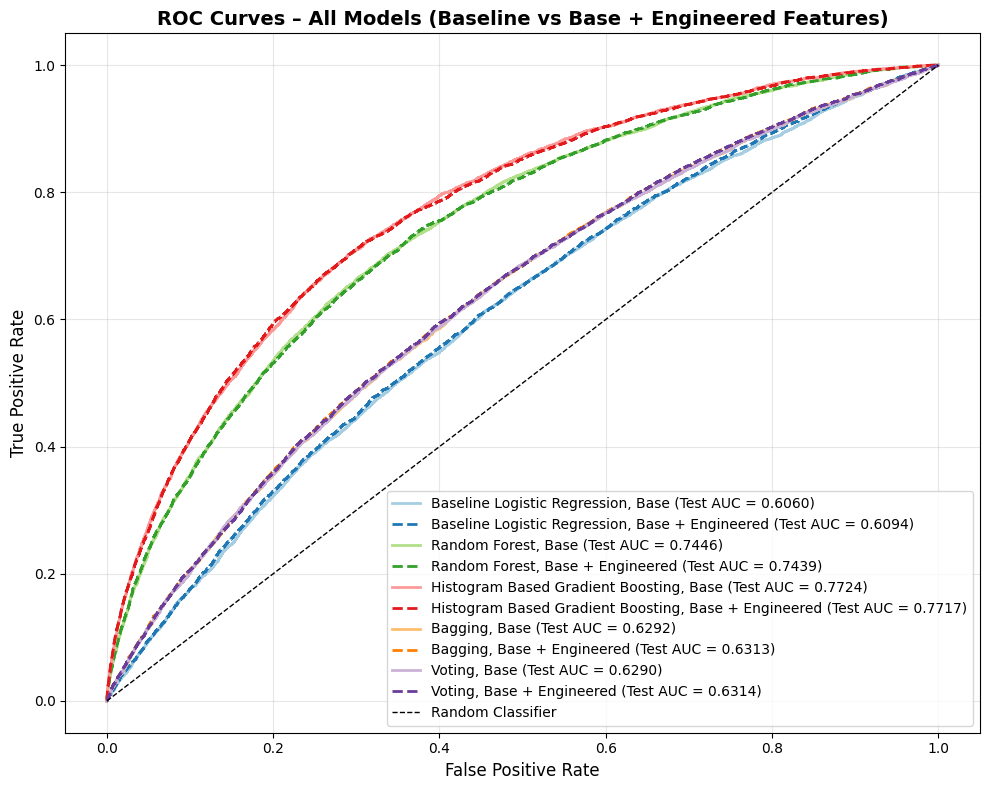

In [25]:
# ===============================================
# ROC Curves – Baseline vs +Engineered
# ===============================================
from sklearn.metrics import roc_curve, auc
from matplotlib import cm
from itertools import cycle

plt.figure(figsize=(10, 8))

colors = cycle(cm.Paired.colors)
linestyles = cycle(['-', '--'])

for i, pipeline in enumerate(recorded_pipelines):
    X_test = Xb_test if pipeline.FeatureSet == 'Base' else Xe_test
    y_test = yb_test if pipeline.FeatureSet == 'Base' else ye_test
    
    y_test_proba = pipeline.Pipeline.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    auc_score = auc(fpr, tpr)

    label = f"{pipeline.ModelName}, {pipeline.FeatureSet} (Test AUC = {auc_score:.4f})"
    plt.plot(fpr, tpr, label=label, linewidth=2, color=next(colors), linestyle=next(linestyles))

plt.plot([0, 1], [0, 1], "k--", label="Random Classifier", linewidth=1)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curves – All Models (Baseline vs Base + Engineered Features)", fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Building Permutation Feature Importance - Baseline Logistic Regression / Base ...
Building Permutation Feature Importance - Baseline Logistic Regression / Base + Engineered ...
Building Permutation Feature Importance - Random Forest / Base ...
Building Permutation Feature Importance - Random Forest / Base + Engineered ...
Building Permutation Feature Importance - Histogram Based Gradient Boosting / Base ...
Building Permutation Feature Importance - Histogram Based Gradient Boosting / Base + Engineered ...
Building Permutation Feature Importance - Bagging / Base ...
Building Permutation Feature Importance - Bagging / Base + Engineered ...
Building Permutation Feature Importance - Voting / Base ...
Building Permutation Feature Importance - Voting / Base + Engineered ...


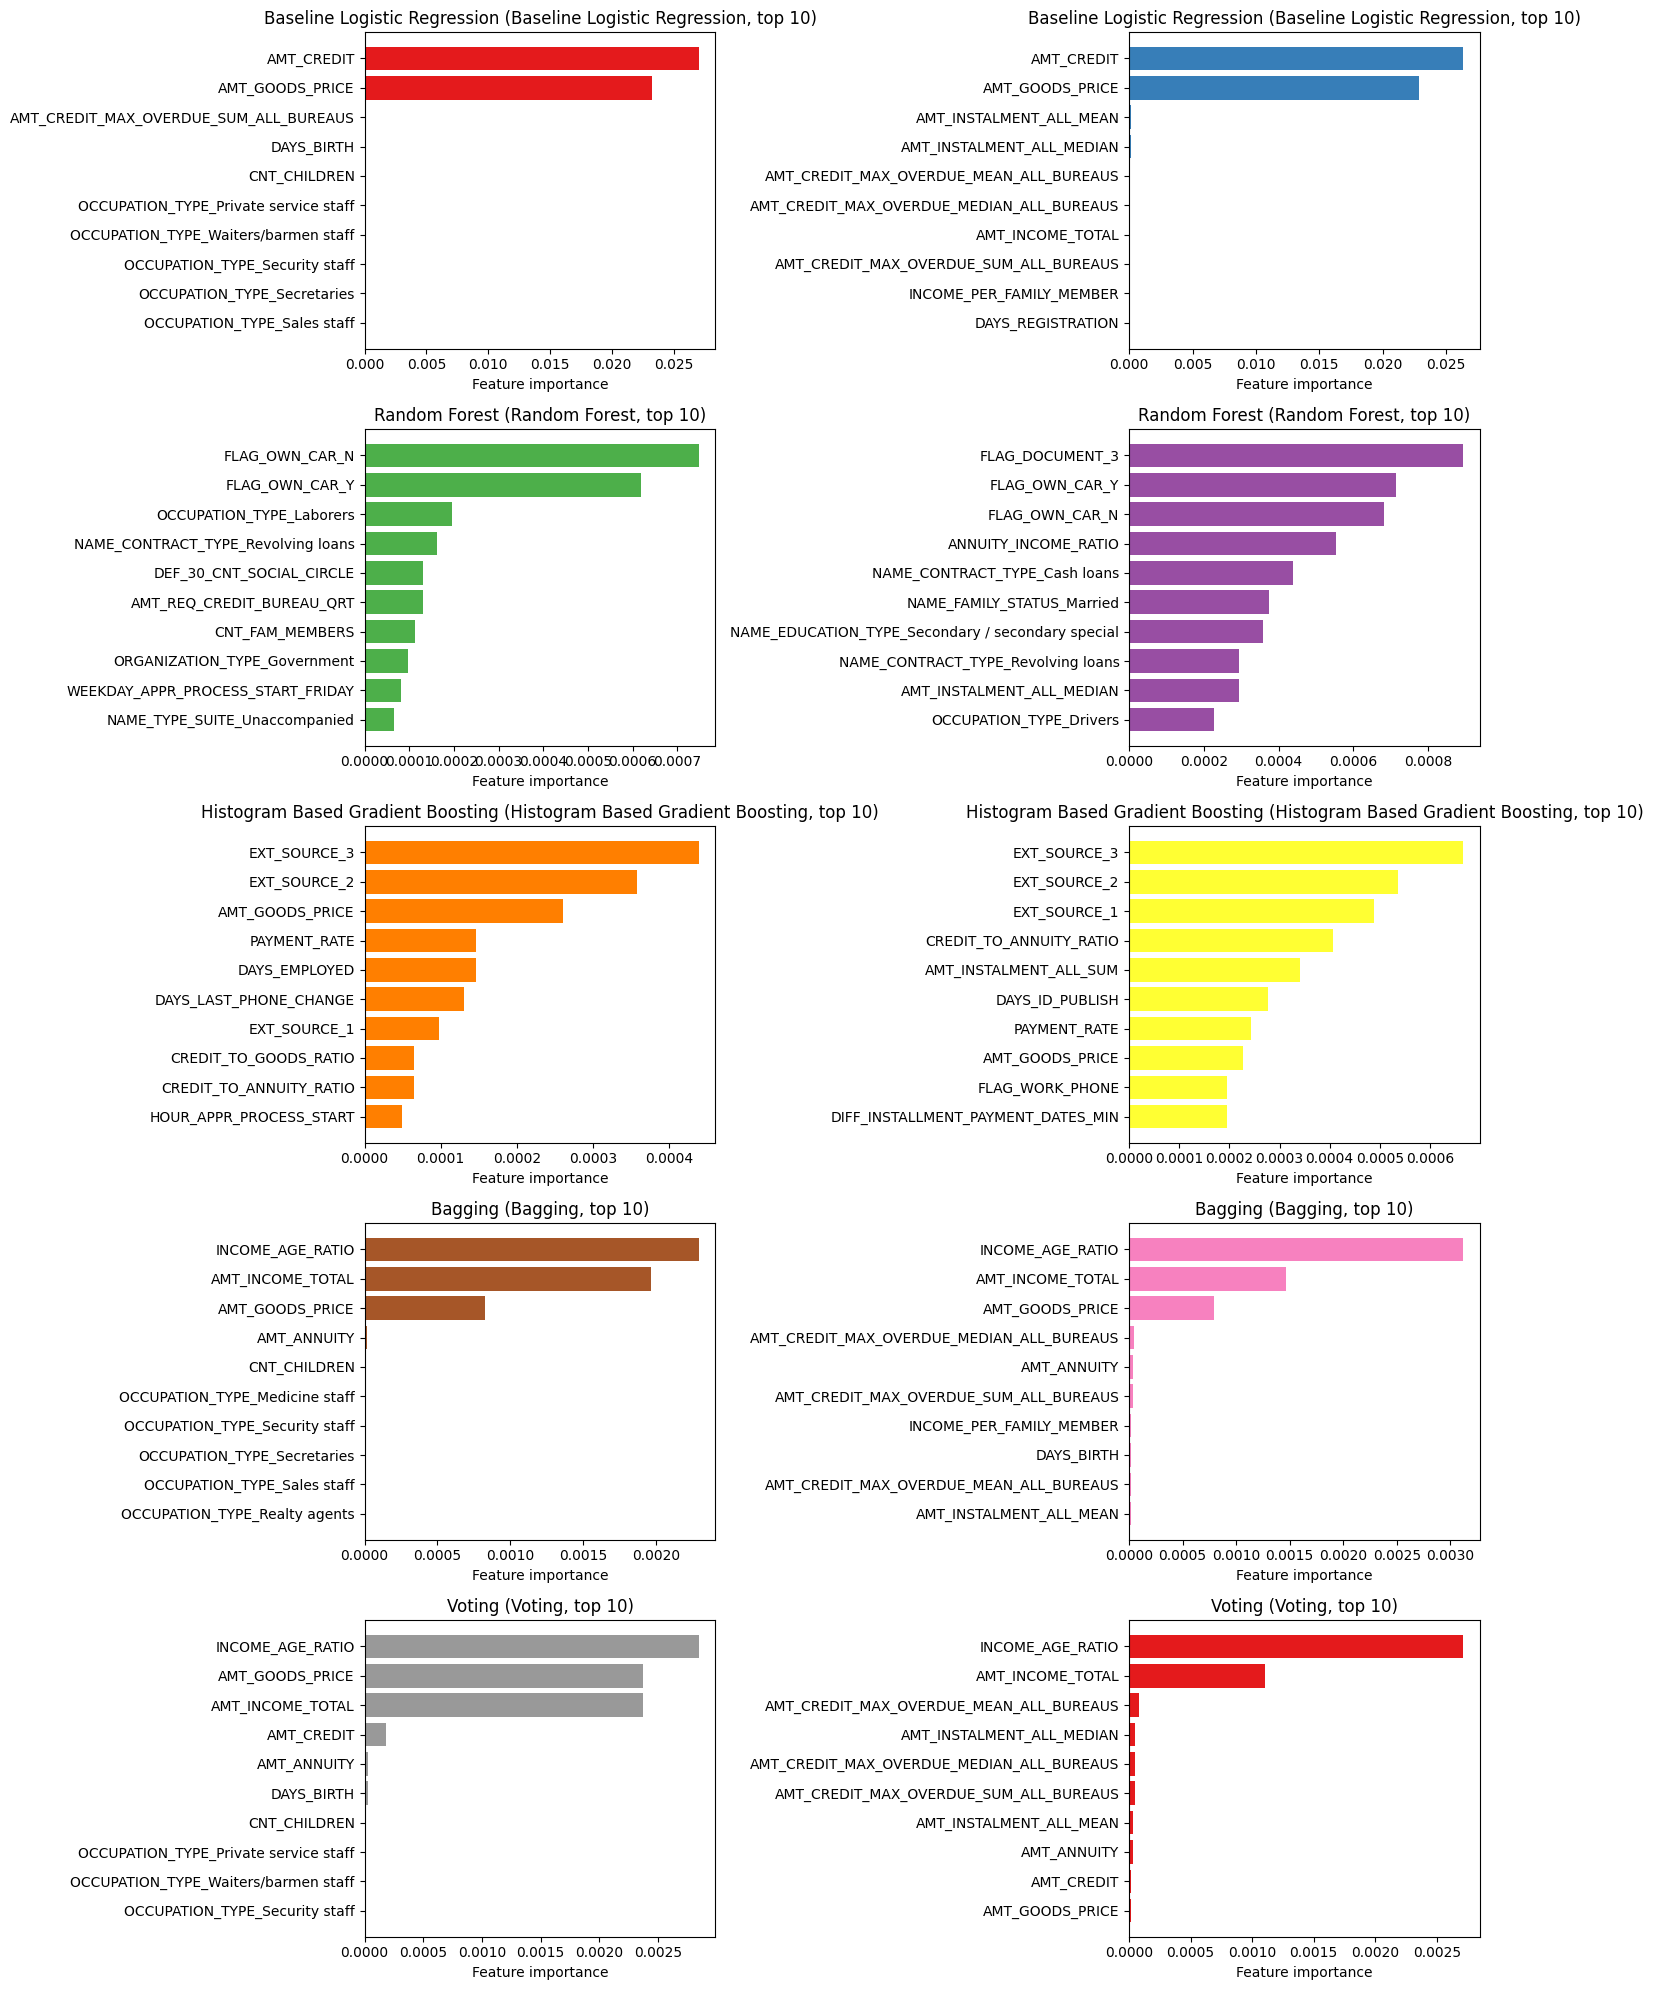

In [26]:
# ===============================
# Helper: get feature names from pipelines
# ===============================

from sklearn.preprocessing import OneHotEncoder

def get_feature_names_from_pipeline(pipeline, numeric_cols, cat_cols):
    """
    Given a fitted Pipeline(preprocess -> model), return the final list
    of feature names after preprocessing (numeric + one-hot encoded categorials).
    """
    preproc = pipeline.named_steps["preprocess"]
    
    # Numeric features pass through SimpleImputer (no name change)
    num_features = list(numeric_cols)
    
    # Categorical features go through imputer + OHE
    # We need to get OHE feature names
    cat_transformer = None
    for name, transformer, cols in preproc.transformers_:
        if name == "cat":
            cat_transformer = transformer
            break
    
    if cat_transformer is None:
        raise ValueError("No 'cat' transformer found in ColumnTransformer.")
    
    ohe = cat_transformer.named_steps["ohe"]
    
    try:
        ohe_feature_names = ohe.get_feature_names_out(cat_cols)
    except AttributeError:
        # Older sklearn
        ohe_feature_names = ohe.get_feature_names(cat_cols)
    
    all_features = num_features + list(ohe_feature_names)
    return all_features


# ===============================
# Feature Importance Plots
# ===============================

import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

fig, axes = plt.subplots(5, 2, figsize = (15, 20))
axes = axes.flatten()

colors = cycle(cm.Set1.colors)

for i, pipeline in enumerate(recorded_pipelines):
    print(f'Building Permutation Feature Importance - {pipeline.ModelName} / {pipeline.FeatureSet} ...')
    baseline_features = get_feature_names_from_pipeline(
        pipeline.Pipeline,
        numeric_cols=baseline_numeric_cols if pipeline.FeatureSet == 'Base' else baseline_numeric_cols + engineered_feats,
        cat_cols=cat_cols
    )

    pipeline_model = pipeline.Pipeline.steps[-1][1]
    use_coef = False
    X = Xb_test if pipeline.FeatureSet == 'Base' else Xe_test
    y = yb_test if pipeline.FeatureSet == 'Base' else ye_test
    X_transformed = pipeline.Pipeline.named_steps['preprocess'].transform(X)
    perm_result = permutation_importance(pipeline.Pipeline.steps[-1][1], X_transformed, y, n_repeats = 1, random_state = 42)
    importances_base = perm_result.importances_mean
    fi_base = (
        pd.DataFrame({
            "feature": baseline_features,
            "importance": importances_base
        })
        .sort_values("importance", ascending=False)
        .reset_index(drop=True)
    )

    top_n = 10
    axes[i].barh(fi_base["feature"].head(top_n)[::-1],
            fi_base["importance"].head(top_n)[::-1], color = next(colors))
    axes[i].set_xlabel("Feature importance" if not use_coef else "Model Coefficient")
    axes[i].set_title(f"{pipeline.ModelName} ({pipeline.ModelName}, top {top_n})")
plt.tight_layout()
plt.show()

## 5. Phase 3 Results & Discussion

In Phase 3 we extended the Phase 2 baseline by introducing a several engineered features and training an ensemble Random Forest model with hyperparameter tuning. 

The tested engineered features (credit-to-income ratio, annuity-to-income ratio, employed years, income per family member) improved the Random Forest’s training AUC minimally (0.8045 → 0.8067), but did not improve validation (0.7247 → 0.7236) or test performance (0.7308 → 0.7304). This suggests that the engineered ratios capture relationships the model already learns from the original features, and therefore do not improve model performance and generalization.

### 5.1 Final experimental logs

**Log #1**: Hyperparameter tuning - aggregated experiment results.

In [75]:
def clean_row(row, modelName, modelParams):
    paramString = ', '.join([f'{paramCol[6:]}: {row[paramCol]}' for paramCol in modelParams])
    return pd.Series({
        'Model': modelName,
        'Parameters': paramString
    })

rf_status_table[['Model', 'Parameters']] = rf_status_table.apply(clean_row, axis = 1, args = ('Random Forest', [c for c in rf_status_table.columns if c.startswith('param_')],))
hbgb_status_table[['Model', 'Parameters']] = hbgb_status_table.apply(clean_row, axis = 1, args = ('Histogram-Based Gradient Boosting', [c for c in hbgb_status_table.columns if c.startswith('param_')],))
bagging_status_table[['Model', 'Parameters']] = bagging_status_table.apply(clean_row, axis = 1, args = ('Bagging', [c for c in bagging_status_table.columns if c.startswith('param_')],))
voting_status_table[['Model', 'Parameters']] = voting_status_table.apply(clean_row, axis = 1, args = ('Voting', [c for c in voting_status_table.columns if c.startswith('param_')],))

expLog = pd.concat([rf_status_table, hbgb_status_table, bagging_status_table, voting_status_table], axis = 0) \
           .drop(columns = [c for c in expLog.columns if c.startswith('param_')] + ['rank_test_score']) \
           .sort_values(by = 'mean_test_score', ascending = False)
reordered_cols = ['Model', 'Parameters'] + [c for c in expLog.columns if c not in ['Model', 'Parameters']]
expLog = expLog[reordered_cols]
expLog.to_csv('Group2_Phase3_HCDR_v3_expLog.csv')
expLog

,Model,Parameters,mean_train_score,std_train_score,mean_test_score,std_test_score
0,Histogram-Based Gradient Boosting,"hbgb__learning_rate: 0.1, hbgb__max_leaf_nodes...",0.824183,0.001124,0.766115,0.002294
1,Histogram-Based Gradient Boosting,"hbgb__learning_rate: 0.1, hbgb__max_leaf_nodes...",0.806977,0.001038,0.766020,0.002571
2,Histogram-Based Gradient Boosting,"hbgb__learning_rate: 0.1, hbgb__max_leaf_nodes...",0.817643,0.001908,0.765770,0.001100
3,Histogram-Based Gradient Boosting,"hbgb__learning_rate: 0.1, hbgb__max_leaf_nodes...",0.822777,0.000994,0.765438,0.000899
4,Histogram-Based Gradient Boosting,"hbgb__learning_rate: 0.1, hbgb__max_leaf_nodes...",0.836754,0.002424,0.765021,0.001127
...,...,...,...,...,...,...
99,Histogram-Based Gradient Boosting,"hbgb__learning_rate: 1.0, hbgb__max_leaf_nodes...",0.822309,0.008436,0.686830,0.004839
0,Bagging,"bag__estimator: LogisticRegression(C=10.0, max...",0.629841,0.001321,0.629327,0.002556
0,Voting,vote__voting: soft,0.629773,0.001298,0.629275,0.002720
1,Bagging,"bag__estimator: LogisticRegression(C=10.0, max...",0.629863,0.001231,0.629267,0.002764


**Log #2**: Ensemble comparison - best fine-tuned models for each variant.

In [80]:
eval_expLog = eval_expLog.sort_values(by = 'test_auc_roc', ascending = False)
eval_expLog.to_csv('Group2_Phase3_HCDR_v3_eval_expLog.csv')
eval_expLog

,Pipeline,Utilized Features,train_auc_roc,val_auc_roc,test_auc_roc
4,Histogram Based Gradient Boosting,Base,0.812567,0.767376,0.772354
5,Histogram Based Gradient Boosting,Base + Engineered,0.814532,0.766910,0.771714
2,Random Forest,Base,0.825284,0.737855,0.744578
3,Random Forest,Base + Engineered,0.830074,0.738497,0.743884
9,Voting,Base + Engineered,0.634567,0.628078,0.631397
7,Bagging,Base + Engineered,0.634434,0.628206,0.631303
6,Bagging,Base,0.629739,0.625967,0.629193
8,Voting,Base,0.629558,0.626041,0.628991
1,Baseline Logistic Regression,Base + Engineered,0.617039,0.610166,0.609397
0,Baseline Logistic Regression,Base,0.611213,0.606551,0.605974


### Bibliography

Home Credit Default Risk (Kaggle dataset).

scikit-learn developers. Logistic Regression, Random Forest, Pipeline, Metrics.

GeeksforGeeks. (2025, July 11). Bagging vs Boosting in Machine Learning. https://www.geeksforgeeks.org/machine-learning/bagging-vs-boosting-in-machine-learning/

Brownlee, J. (2021, April 26). Histogram-based gradient boosting ensembles. Machine Learning Mastery. https://machinelearningmastery.com/histogram-based-gradient-boosting-ensembles/Retry